In [42]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

#-- 
#https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

import warnings
warnings.filterwarnings('ignore')

#-- -colors for DCs
col_ids =['tomato','paleturquoise','cornflowerblue','mediumseagreen','mediumpurple',
          'goldenrod','lightgreen','palevioletred','lightsalmon','thistle', #0-9
          "brown","plum","lightskyblue","yellowgreen","mediumorchid","mediumturquoise","peru",
          "#bf812d","mediumaquamarine","lightslategrey","dodgerblue","#4daf4a",'#377eb8','#dd1c77']

col_pGroups = ["#d8daeb", "#9e9ac8", "#54278f","#66bd63"]
col_groups = ["#9e9ac8","#66bd63"]

scanpy==1.7.1 anndata==0.7.5 umap==0.4.6 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [43]:
sc.settings.set_figure_params(dpi=80)

# Read cleaned data 
# October 11 2021 : number SC = 47 

In [44]:
cleaned_corrected=sc.read('../H5AD/pCoV40_cleaned_10112021.h5ad')
cleaned_corrected

AnnData object with n_obs × n_vars = 247328 × 1362
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'Res1_2_BC', 'Res1_2_AC', 'Fig_ids_Groups', 'annotated_clusters', 'ISG_score_raw', 'ISG_score', 'INFLAM_score_raw', 'INFLAM_score', 'SCs'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Fig_ids_colors', 'Groups_colors', 'Patient_groups_colors', 'Res1_2_AC_colors', 'annotated_clusters_colors', 'dendrogram_Fig_ids', 'dendrogram_Patient_groups', 'dendrogram_SCs', "dendrogram_['SCs']", "dendrogram_['annotated_clusters']", 'dendrogram_annotated_clusters', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [45]:
cleaned_corrected.uns['Groups_colors']=col_groups
cleaned_corrected.uns['Patient_groups_colors']=col_pGroups
cleaned_corrected.uns['annotated_clusters_colors']=col_ids


# Figure. 1C

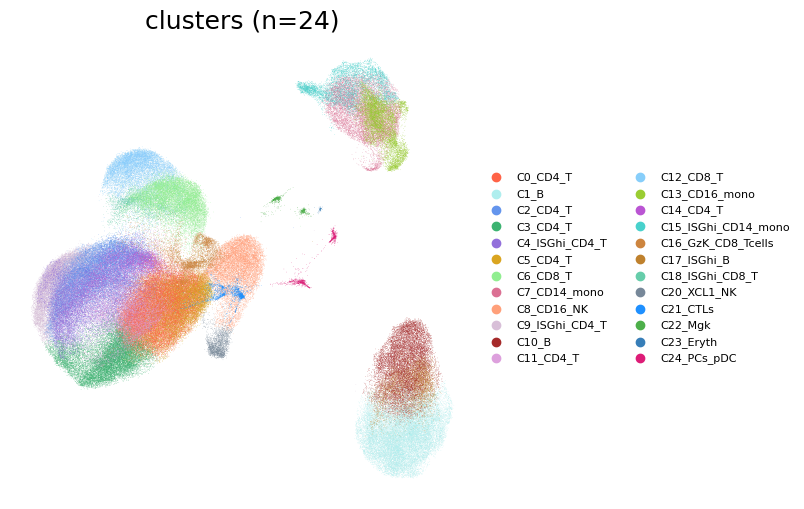

In [46]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (6,6)

plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=20)    # legend fontsize

sc.pl.umap(cleaned_corrected, 
           color=['annotated_clusters'], 
           color_map='OrRd',
           size=0.5, #***
           ncols=2,
           frameon=False,
           #legend_loc='on data',
           legend_fontsize=8, 
           title= 'clusters (n=24)')

# Figure. 1D

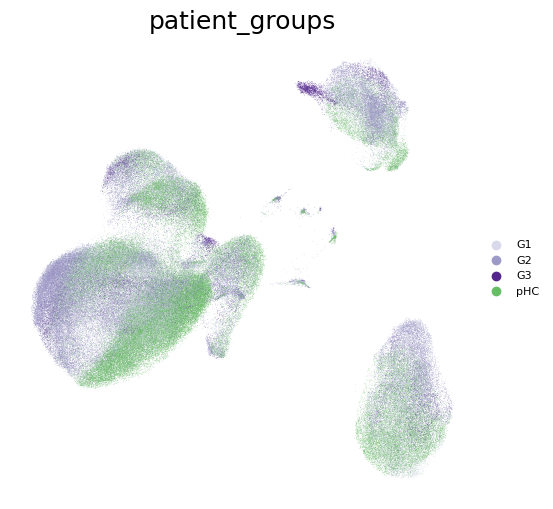

In [47]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (6,6)

plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=20)    # legend fontsize

sc.pl.umap(cleaned_corrected, 
           color=['Patient_groups'], 
           color_map='OrRd',
           size=0.5, #***
           ncols=2,
           frameon=False,
           #legend_loc='on data',
           legend_fontsize=8, 
           title= 'patient_groups')

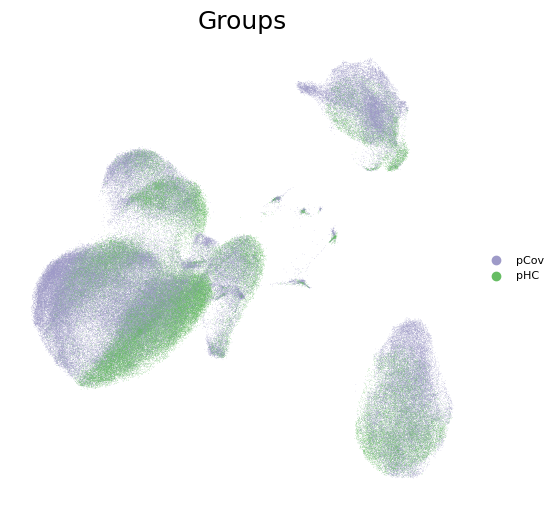

In [48]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (6,6)

plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=20)    # legend fontsize

sc.pl.umap(cleaned_corrected, 
           color=['Groups'], 
           color_map='OrRd',
           size=0.5, #***
           ncols=2,
           frameon=False,
           #legend_loc='on data',
           legend_fontsize=8, 
           title= 'Groups')

# Figure.1E

categories: C0_CD4_T, C1_B, C2_CD4_T, etc.
var_group_labels: Mgk, Mono, DCs, etc.


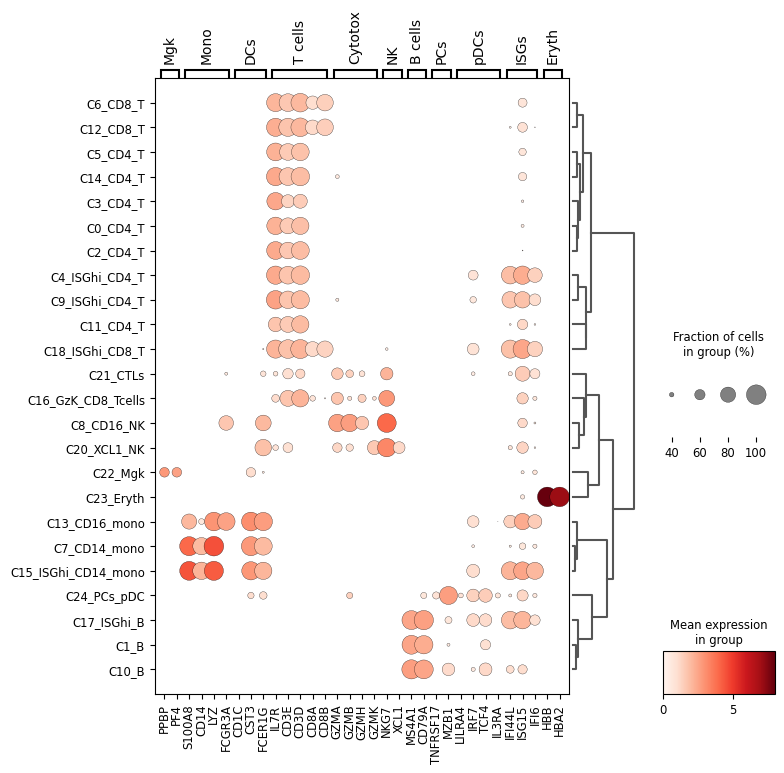

In [49]:
Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK",
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #20-21
        "TNFRSF17", "MZB1",#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", #24-27
        'IFI44L','ISG15','IFI6',#28-30
        'HBB','HBA2'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(cleaned_corrected, 
                   Genes, 
                   'annotated_clusters', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth'], 
                   figsize=(8,8),
                    dot_max=1, 
                   dot_min=0.3) 
                   #title= 'SCs (n=43)', 
                   #save='SCs_pCov40_Clusters_07082021.pdf') 


In [50]:
keep = ['neighbors', ]
keys = list(cleaned_corrected.uns.keys())
for key in keys:
    if key not in keep:
        del cleaned_corrected.uns[key]

# Figure 6B

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_SCs']`
categories: B_cells_SC0, B_cells_SC1, B_cells_SC2, etc.
var_group_labels: Mgk, Mono, DCs, etc.


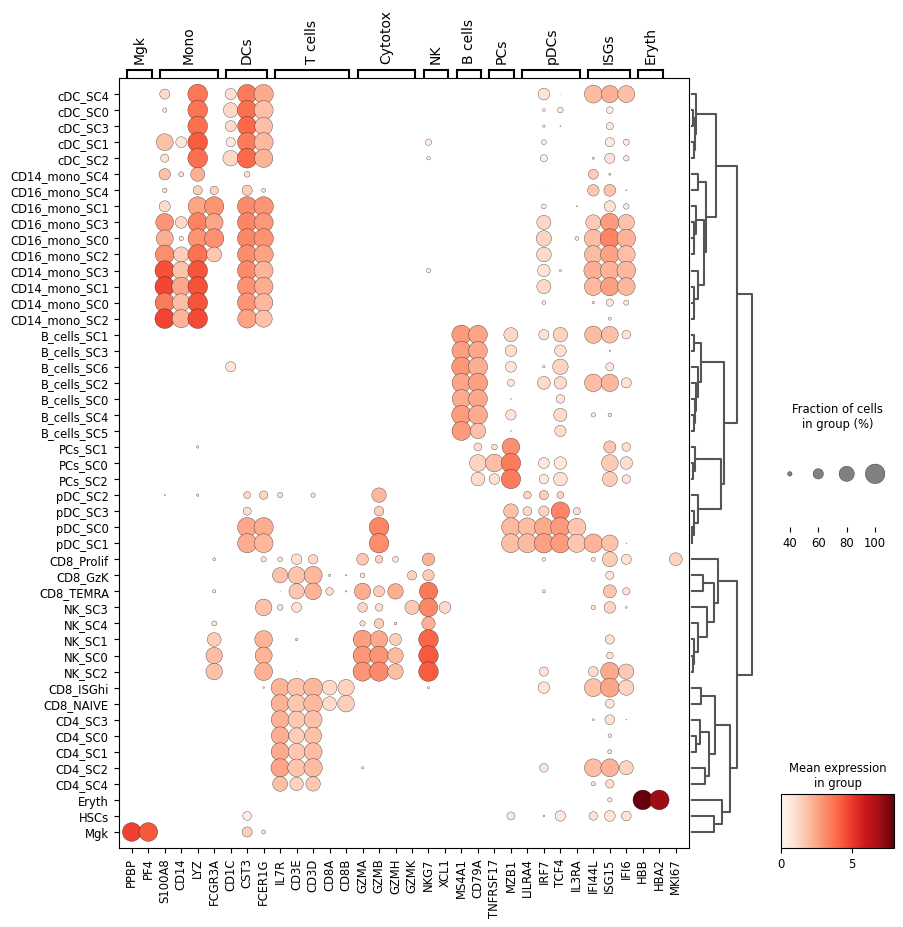

In [51]:
Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK",
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #20-21
        "TNFRSF17", "MZB1",#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", #24-27
        'IFI44L','ISG15','IFI6',#28-30
        'HBB','HBA2','MKI67'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(cleaned_corrected, 
                   Genes, 
                   'SCs', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth'], 
                   figsize=(10,10),
                    dot_max=1, 
                   dot_min=0.3) 
                   #title= 'SCs (n=43)', 
                   #save='SCs_pCov40_cleaned_SCs_10112021.pdf') 



#  Figure S6A

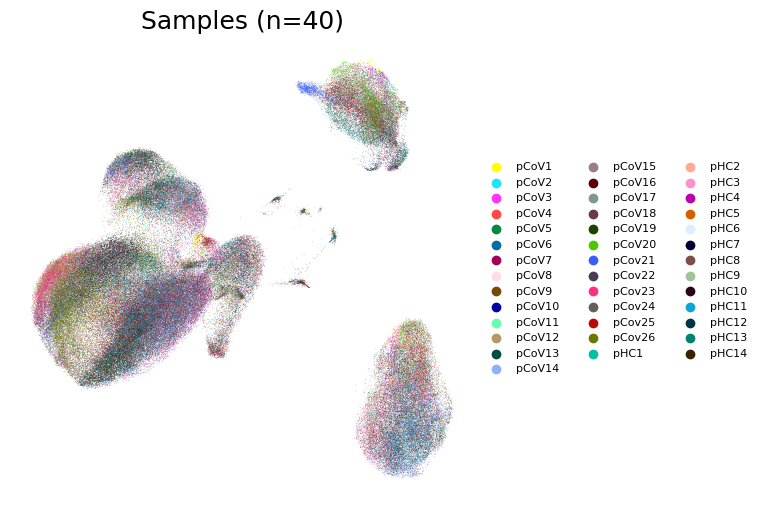

In [52]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (6,6)

plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=20)    # legend fontsize

sc.pl.umap(cleaned_corrected, 
           color=['Fig_ids'], 
           color_map='OrRd',
           size=0.5, #***
           ncols=2,
           frameon=False,
           #legend_loc='on data',
           legend_fontsize=8, 
           title= 'Samples (n=40)')
           #save= '_pCoV40_Fig_ids_10112021.pdf')

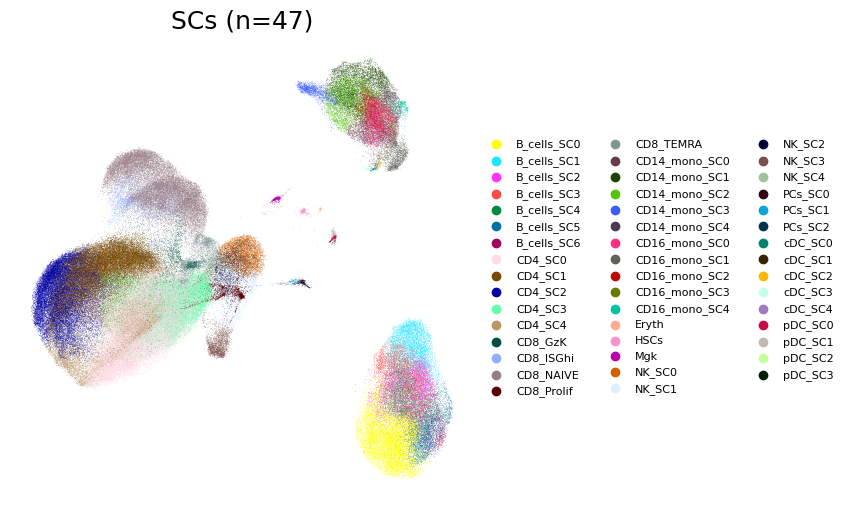

In [53]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (6,6)

plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=20)    # legend fontsize

sc.pl.umap(cleaned_corrected, 
           color=['SCs'], 
           color_map='OrRd',
           size=0.5, #***
           ncols=2,
           frameon=False,
           #legend_loc='on data',
           legend_fontsize=8, 
           title= 'SCs (n=47)')
           #save= '_pCoV40_Annotated_SCs_10112021.pdf')


# Figure S6B

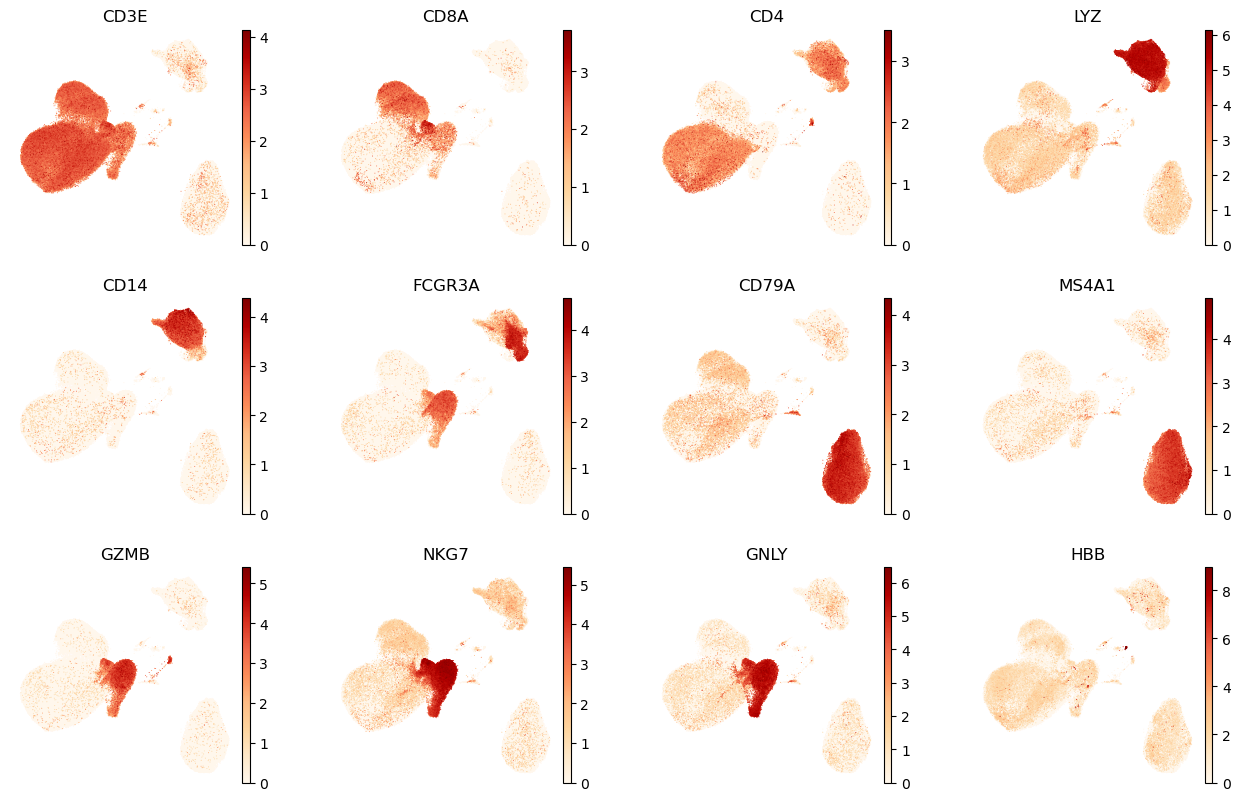

In [54]:
matplotlib.style.use('default')   
rcParams['figure.figsize'] = (3,3)

genes=['CD3E','CD8A','CD4','LYZ',
       'CD14','FCGR3A','CD79A','MS4A1',
       'GZMB','NKG7','GNLY','HBB']

sc.pl.umap(cleaned_corrected, 
           color=genes,
           size=2, 
           color_map='OrRd',
           ncols=4,
           frameon=False) #save='_pCoV40_MarkerGenes_07082021.pdf')

# Figure S6C

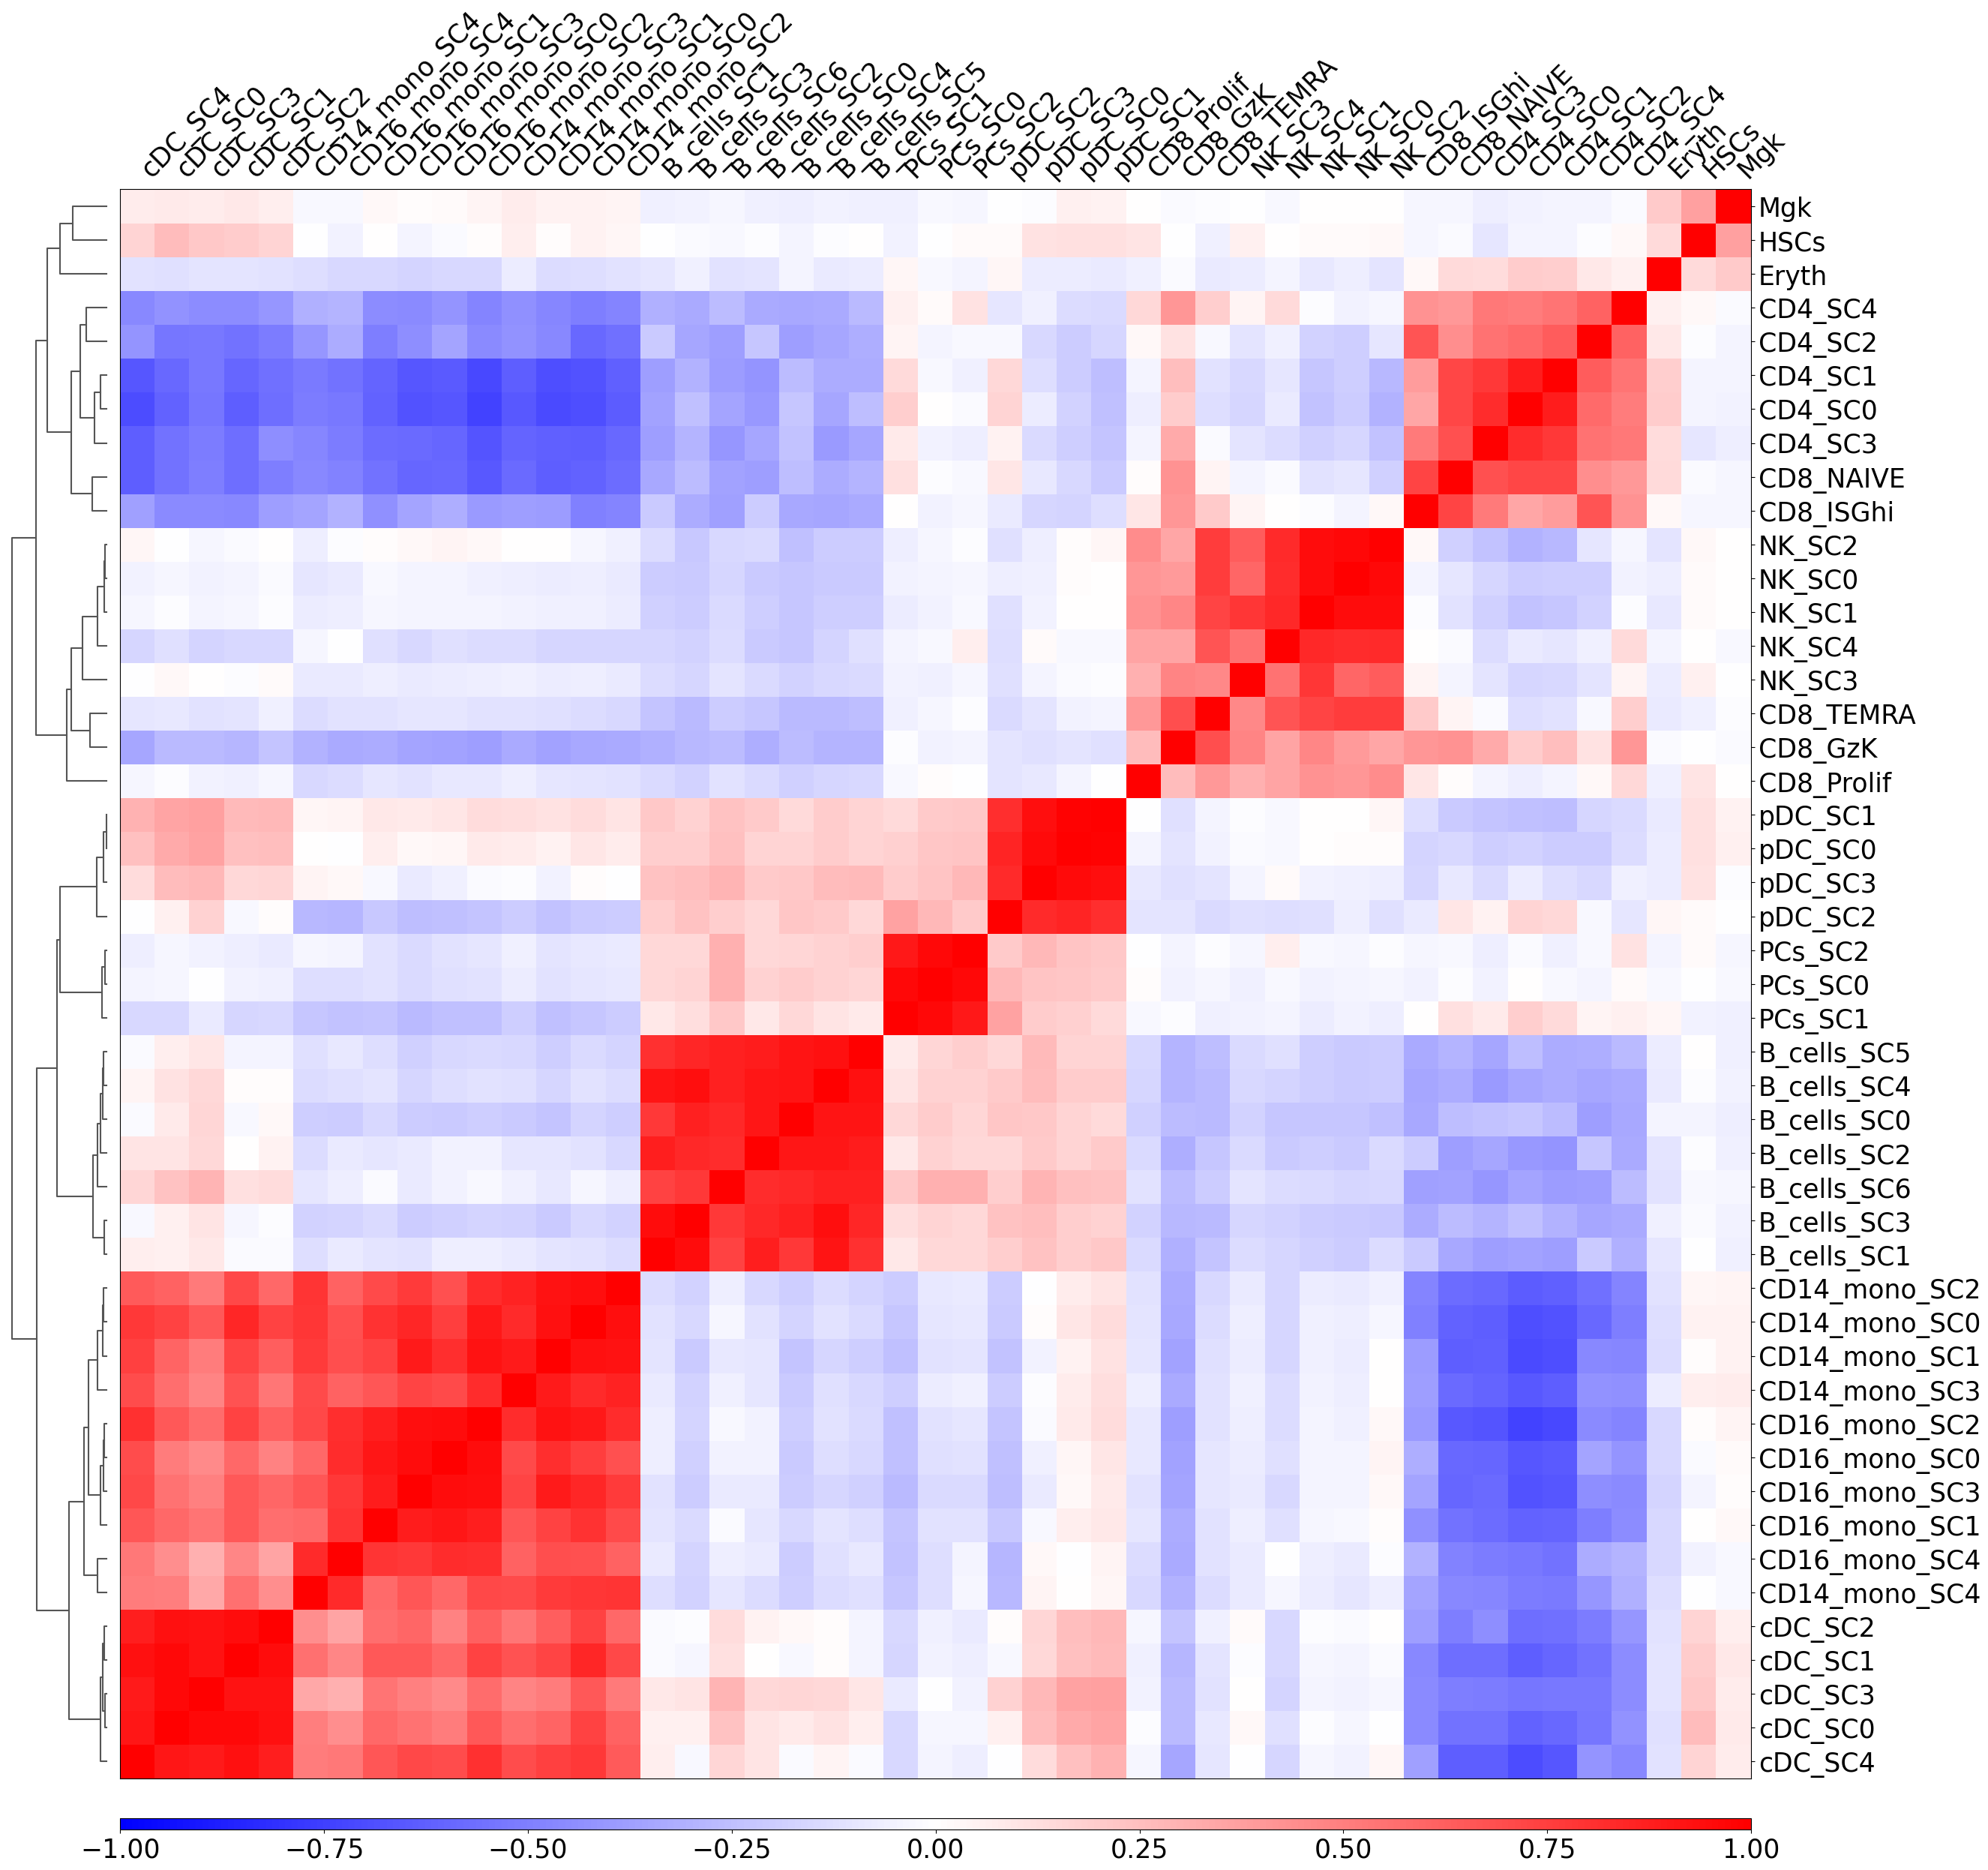

In [55]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (4,4)
plt.rc('font', size=25)          # controls default text sizes

ax = sc.pl.correlation_matrix(cleaned_corrected, 'SCs') #save='CorPlot_pCoV40_SCs_10112021.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Patient_groups']`


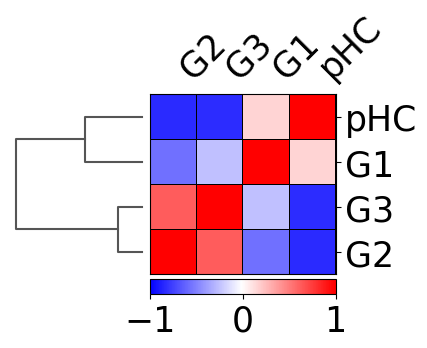

In [56]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (4,4)
plt.rc('font', size=25)          # controls default text sizes

ax = sc.pl.correlation_matrix(cleaned_corrected, 'Patient_groups') #,save='CorPlot_pCoV40_Patient_groups_10112021.pdf')